In [169]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [170]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [171]:
# Values = [10, 2]
Values = [10, 1]
Weights = [2, 3]
# Weights = [2, 3]
Ancil = [1, 2]

# alpha = 100  # this gave best accuracy so far!
alpha = 100
beta = 4.01
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [172]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [173]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-4.000000000000003
[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [174]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [175]:
def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# print(H(0))
# print(H(T))

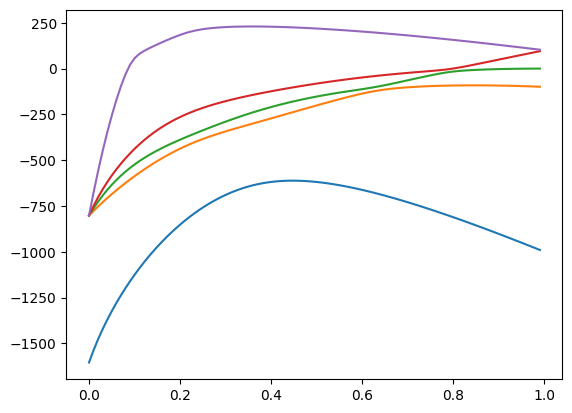

In [176]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [177]:
int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)

In [178]:
U = expm(-1j * int_H_T)
# print(U.conjugate().transpose() @ U)

In [179]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
print(psi_ini)
print(np.linalg.norm(psi_ini))

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]
1.0000000000000004


In [180]:
psi_final = U @ psi_ini
print(psi_final)
print(np.linalg.norm(psi_final))

[ 0.292-0.071j -0.05 -0.214j -0.071-0.028j  0.043-0.188j -0.122+0.182j
  0.179-0.039j -0.178+0.11j  -0.201-0.039j -0.146+0.09j  -0.589+0.016j
  0.238-0.102j  0.025+0.071j  0.08 -0.208j -0.086-0.207j  0.236-0.07j
  0.01 +0.203j]
1.0000000000000475


In [181]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [182]:
def int_H(t):
    return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def Unitary(t):
    return expm(-1j * int_H(t))

In [183]:
int_H(T) - int_H_T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [184]:
int_H(T)

array([[    0. ,   200.5,   200.5,     0. ,   200.5,     0. ,     0. ,
            0. ,   200.5,     0. ,     0. ,     0. ,     0. ,     0. ,
            0. ,     0. ],
       [  200.5,  2200. ,     0. ,   200.5,     0. ,   200.5,     0. ,
            0. ,     0. ,   200.5,     0. ,     0. ,     0. ,     0. ,
            0. ,     0. ],
       [  200.5,     0. ,   550. ,   200.5,     0. ,     0. ,   200.5,
            0. ,     0. ,     0. ,   200.5,     0. ,     0. ,     0. ,
            0. ,     0. ],
       [    0. ,   200.5,   200.5,  4950. ,     0. ,     0. ,     0. ,
          200.5,     0. ,     0. ,     0. ,   200.5,     0. ,     0. ,
            0. ,     0. ],
       [  200.5,     0. ,     0. ,     0. ,  4900. ,   200.5,   200.5,
            0. ,     0. ,     0. ,     0. ,     0. ,   200.5,     0. ,
            0. ,     0. ],
       [    0. ,   200.5,     0. ,     0. ,   200.5,   500. ,     0. ,
          200.5,     0. ,     0. ,     0. ,     0. ,     0. ,   200.5,
            0

In [185]:
H(T)

array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,  4400.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,  1100.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,  9900.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,  9800.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,  1000.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,  4300.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,   

In [186]:
Unitary(T)

array([[ 0.758+0.193j, -0.055+0.087j, -0.394+0.134j,  0.018-0.021j,
        -0.016-0.039j,  0.119-0.079j,  0.055-0.038j, -0.191+0.222j,
         0.037-0.068j, -0.073-0.035j, -0.152-0.08j ,  0.181-0.132j,
        -0.   +0.001j, -0.003+0.005j,  0.002+0.003j,  0.003-0.014j],
       [-0.055+0.087j,  0.248+0.924j,  0.006-0.004j, -0.007-0.141j,
         0.008-0.02j , -0.074+0.129j, -0.023-0.019j, -0.024+0.016j,
        -0.048+0.107j,  0.08 +0.073j,  0.017+0.024j, -0.05 -0.007j,
         0.001-0.001j,  0.002-0.011j,  0.   +0.j   ,  0.005-0.001j],
       [-0.394+0.134j,  0.006-0.004j, -0.555+0.488j,  0.026-0.057j,
         0.017-0.01j ,  0.156-0.057j, -0.058+0.006j,  0.231-0.177j,
         0.131-0.052j,  0.09 -0.038j, -0.337+0.018j, -0.081-0.103j,
        -0.002+0.001j, -0.011+0.003j,  0.01 -0.001j, -0.019+0.027j],
       [ 0.018-0.021j, -0.007-0.141j,  0.026-0.057j,  0.111-0.976j,
        -0.022-0.004j, -0.015-0.003j,  0.014-0.008j, -0.016-0.053j,
        -0.004+0.j   , -0.03 -0.01j ,  0.033-

In [187]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

[np.complex128(-1604.0000000000011+0j), np.complex128(-1536.2056159217486+0j), np.complex128(-1471.2220101204812+0j), np.complex128(-1403.5072653698055-8.526512829121202e-14j), np.complex128(-1335.103331755152+0j), np.complex128(-1296.2148848025977+0j), np.complex128(-1254.778003231182+0j), np.complex128(-1169.9966019696365+0j), np.complex128(-1072.6076997755156+0j), np.complex128(-1097.870166448376+2.842170943040401e-14j), np.complex128(-922.1329363842966-2.842170943040401e-14j), np.complex128(-1014.3255917607798+0j), np.complex128(-853.0363811304653+0j), np.complex128(-937.1584479425235+1.4210854715202004e-14j), np.complex128(-711.844375435033+0j), np.complex128(-775.1661620733626+1.4210854715202004e-14j), np.complex128(-799.0489618418164+3.552713678800501e-15j), np.complex128(-728.9851648551236+0j), np.complex128(-678.1812447626037-1.0658141036401503e-14j), np.complex128(-634.1750186317868+1.4210854715202004e-14j), np.complex128(-448.42373729117486-1.4210854715202004e-14j), np.compl

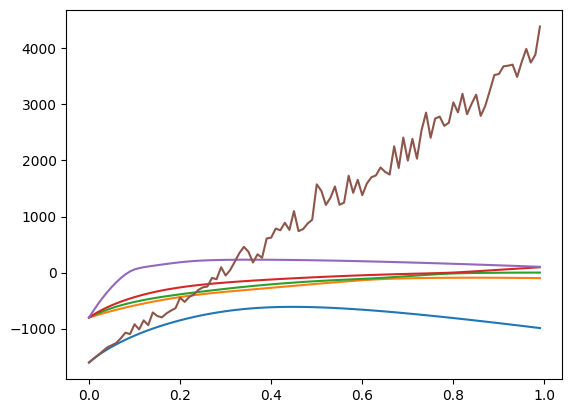

In [188]:
instant_eigenvals = []

for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [189]:
accuracy_list = []
beta_list = np.arange(0, 15, 0.01)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    # print(psi_final)
    # print(psi_final.conjugate().transpose() @ psi_final)
    accuracy = np.abs(np.dot(psi_correct, psi_final))**2
    # print(accuracy)
    accuracy_list.append(accuracy)
    
accuracy_list = np.array(accuracy_list)

Text(0, 0.5, 'accuracy')

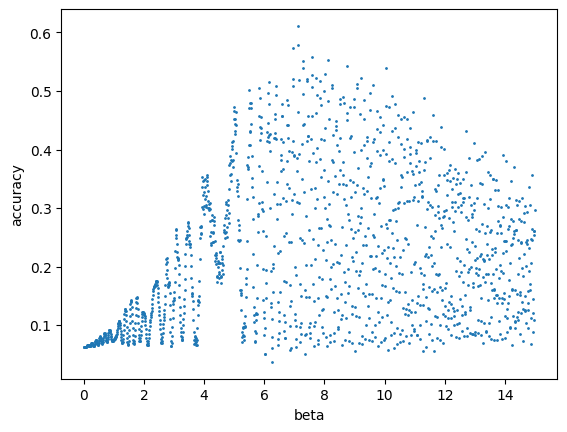

In [190]:
plt.scatter(beta_list, accuracy_list, s=1)
plt.xlabel("beta")
plt.ylabel("accuracy")

In [191]:
max(accuracy_list)

np.float64(0.6111562319914219)

In [192]:
beta_list[accuracy_list.argmax()]

np.float64(7.13)